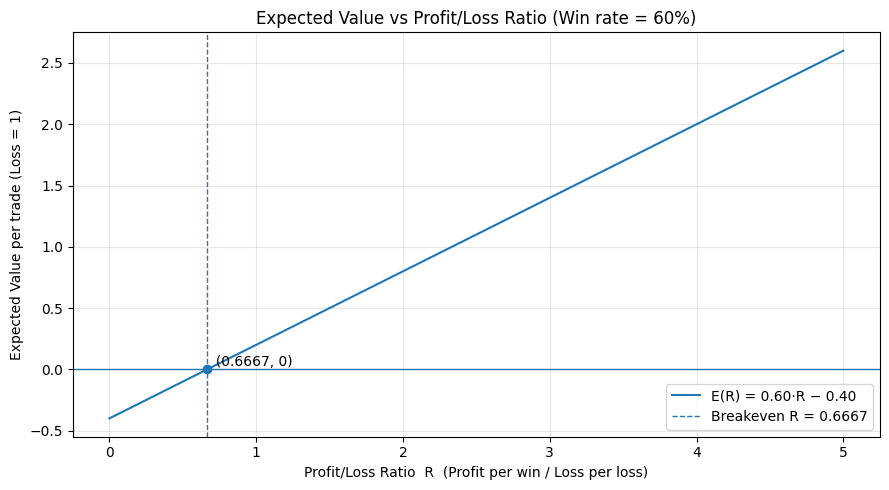

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p = 0.60  # win rate
R = np.linspace(0, 5, 1000)  # profit/loss ratio range: Profit / Loss
E = p * R - (1 - p)          # expected value per trade when loss is normalized to 1

# Breakeven R where E=0
R_be = (1 - p) / p

plt.figure(figsize=(9, 5))
plt.plot(R, E, label=f"E(R) = {p:.2f}·R − {1-p:.2f}")
plt.axhline(0, linewidth=1)
plt.axvline(R_be, linestyle="--", linewidth=1, label=f"Breakeven R = {(R_be):.4f}")

# Annotate breakeven point
plt.scatter([R_be], [0], zorder=3)
plt.text(R_be, 0, f"  ({R_be:.4f}, 0)", va="bottom")

plt.title("Expected Value vs Profit/Loss Ratio (Win rate = 60%)")
plt.xlabel("Profit/Loss Ratio  R  (Profit per win / Loss per loss)")
plt.ylabel("Expected Value per trade (Loss = 1)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


/Users/macbook/.pyenv/versions/3.10.17/lib/python3.10/site-packages/mpl_toolkits/mplot3d/art3d.py:1403: RuntimeWarning: divide by zero encountered in matmul
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))
/Users/macbook/.pyenv/versions/3.10.17/lib/python3.10/site-packages/mpl_toolkits/mplot3d/art3d.py:1403: RuntimeWarning: overflow encountered in matmul
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))


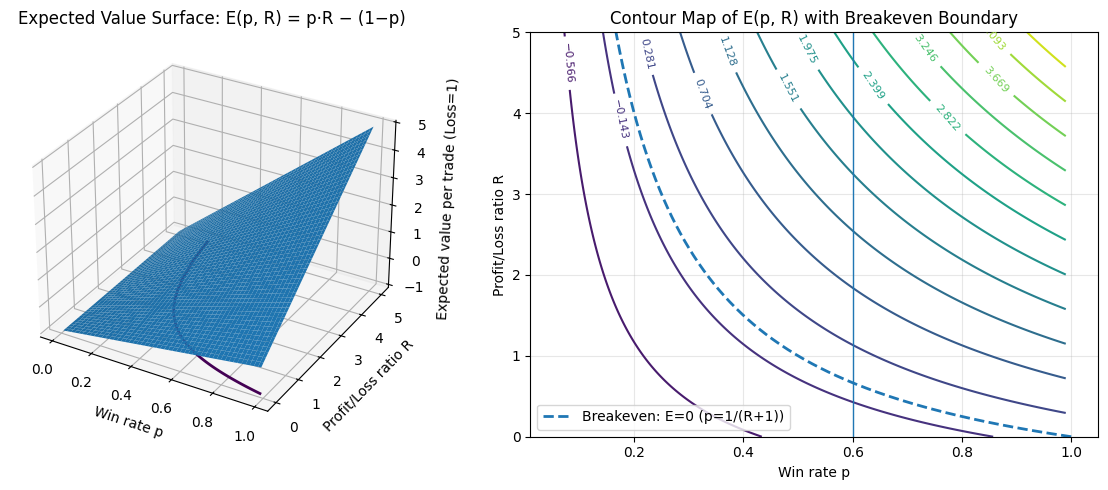

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Grid ranges
p = np.linspace(0.01, 0.99, 200)   # win rate
R = np.linspace(0.0, 5.0, 250)     # profit/loss ratio (profit per win / loss per loss)

P, RR = np.meshgrid(p, R, indexing="xy")
E = P * RR - (1 - P)  # E(p,R) = p*R - (1-p)

# --- 3D surface plot ---
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
surf = ax1.plot_surface(P, RR, E, linewidth=0, antialiased=True)

ax1.set_title("Expected Value Surface: E(p, R) = p·R − (1−p)")
ax1.set_xlabel("Win rate p")
ax1.set_ylabel("Profit/Loss ratio R")
ax1.set_zlabel("Expected value per trade (Loss=1)")

# Mark E=0 plane by drawing a contour on the surface projection
ax1.contour(P, RR, E, levels=[0], offset=np.min(E), linewidths=2)

# --- 2D contour plot + breakeven line ---
ax2 = fig.add_subplot(1, 2, 2)
levels = np.linspace(np.min(E), np.max(E), 15)
cs = ax2.contour(P, RR, E, levels=levels)
ax2.clabel(cs, inline=True, fontsize=8)

# Breakeven boundary E=0: p = 1/(R+1)
R_line = np.linspace(0.0, 5.0, 400)
p_be = 1.0 / (R_line + 1.0)
ax2.plot(p_be, R_line, linestyle="--", linewidth=2, label="Breakeven: E=0 (p=1/(R+1))")

# Cosmetics
ax2.axvline(0.6, linewidth=1)  # optional reference
ax2.set_title("Contour Map of E(p, R) with Breakeven Boundary")
ax2.set_xlabel("Win rate p")
ax2.set_ylabel("Profit/Loss ratio R")
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()
